In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor

In [2]:
import pandas as pd
def table(x,y,ex=None,ey=None,bx=True,by=True):
    if bx==True and by==True:
        dic={'x':x,'ex':ex,'y':y,'ey':ey}
    elif bx==False:
        dic={'x':x,'y':y,'ey':ey}
    elif by==False:
        dic={'x':x,'ex':ex,'y':y}
    else:
        dic={'x':x,'y':y}
    tab=pd.DataFrame(dic)
    return (tab)

def wm(sample,sigmas):
    w=np.power(sigmas,-2)
    c=(sample*w).sum()/w.sum()
    s=np.power(1/w.sum(),0.5)
    return (c,s)

In [3]:
from math import modf, pi, sin, cos
class angle():
    def __init__(self, gradi, primi):
        self.gradi = gradi
        self.primi = primi
    def rad(self):
        a = self.gradi
        b = self.primi/60
        return (a+b)*pi/180
    def sin(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return sin(c)
    def cos(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return cos(c)
    def somma(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 + c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def diff(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 - c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def opposto(self):
        return angle(-self.gradi, -self.primi)
    def __str__(self):
        return '{:.0f}'.format(self.gradi)+'° '+'{:.0f}'.format(self.primi)+"'"

In [4]:
def labhist(alpha1, w=1):
    fig,ax=plt.subplots(figsize=(10,10),dpi=125)
    l=len(alpha1)
    sigma1=alpha1.std(ddof=1)
    mi1=alpha1.mean()
    U=np.array([str(a) for a in np.unique(alpha1)], dtype=str)
    freqs=np.array([str(len(alpha1[alpha1==a])) for a in np.unique(alpha1)],dtype=str)
    Title=np.array([a+'  '+b for a,b in zip(U, freqs)])
    ax.bar(alpha1, [len(alpha1[alpha1==a]) for a in alpha1],width=w, label=r'$\sigma=$'+'{:.1f}°'.format(sigma1)+'\n'+r'$\mu=$'+'{:.1f}°'.format(mi1))
    ax.legend(title=r'$x$  N'+'\n'+'\n'.join(Title), title_fontsize=10)
    ax.set_ylabel(r'N')
    ax.set_xticks(alpha1)
    ax.set_xticklabels(alpha1,rotation=60)
    plt.show()
    return (mi1, sigma1)

In [5]:
def round_sig(x, sig=2):
    from math import floor, log10
    return round(x, sig-int(floor(log10(abs(x))))-1)
rs=np.vectorize(round_sig)

def round_err_based(value,error):
    from math import log10,ceil,floor
    v=(floor(log10(abs(value))))
    e=(floor(log10(abs(error))))
    sig=(v-e)+1
    return round_sig(value,sig)
reb=np.vectorize(round_err_based)
r=np.vectorize(round, excluded=['ndigits'])

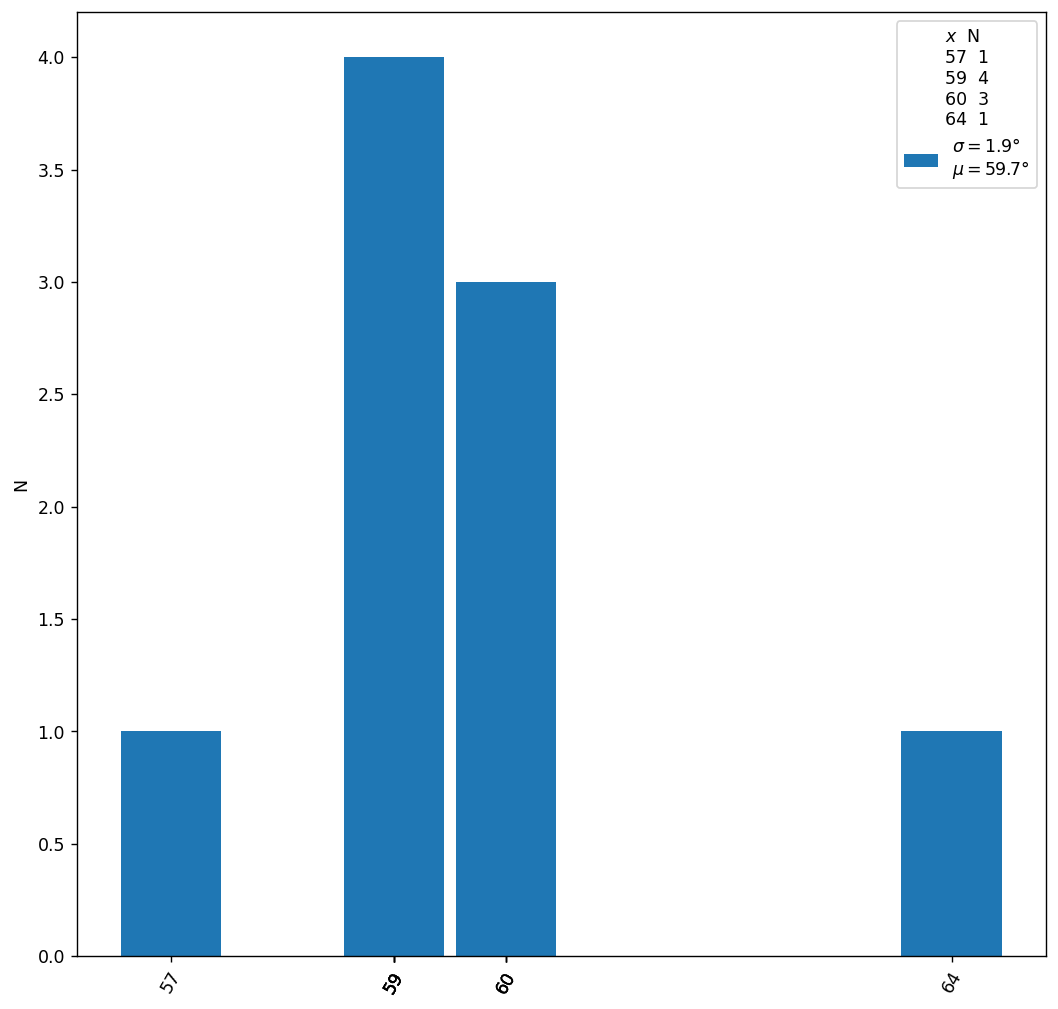

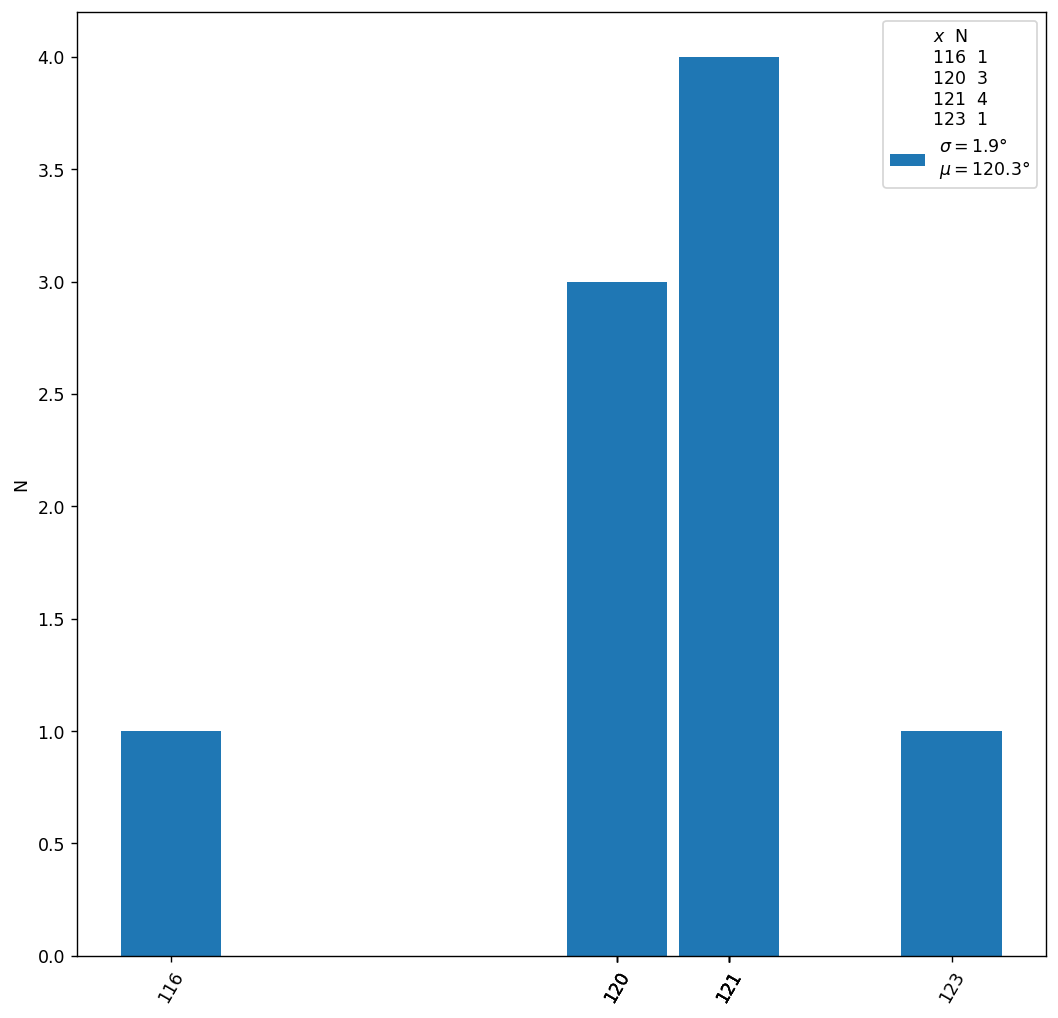

,x,ex,y,ey
0,121,1,59,1
1,120,1,60,1
2,121,1,59,1
3,121,1,59,1
4,120,1,60,1
5,116,1,64,1
6,121,1,59,1
7,123,1,57,1
8,120,1,60,1


In [6]:
errphi1=0.5
fname1='alpha1.txt'
data_phi=np.loadtxt(fname1, dtype='float', comments='#')
phi1=data_phi[:,0]
phi2=data_phi[:,1]
phi=r(np.abs(phi1-phi2))
alpha1=180-phi
mi1, sigma1=labhist(alpha1,w=0.9)
miphi, simgaphi=labhist(phi, w=0.9)
table(phi,alpha1,[1]*len(phi), [1]*len(alpha1))

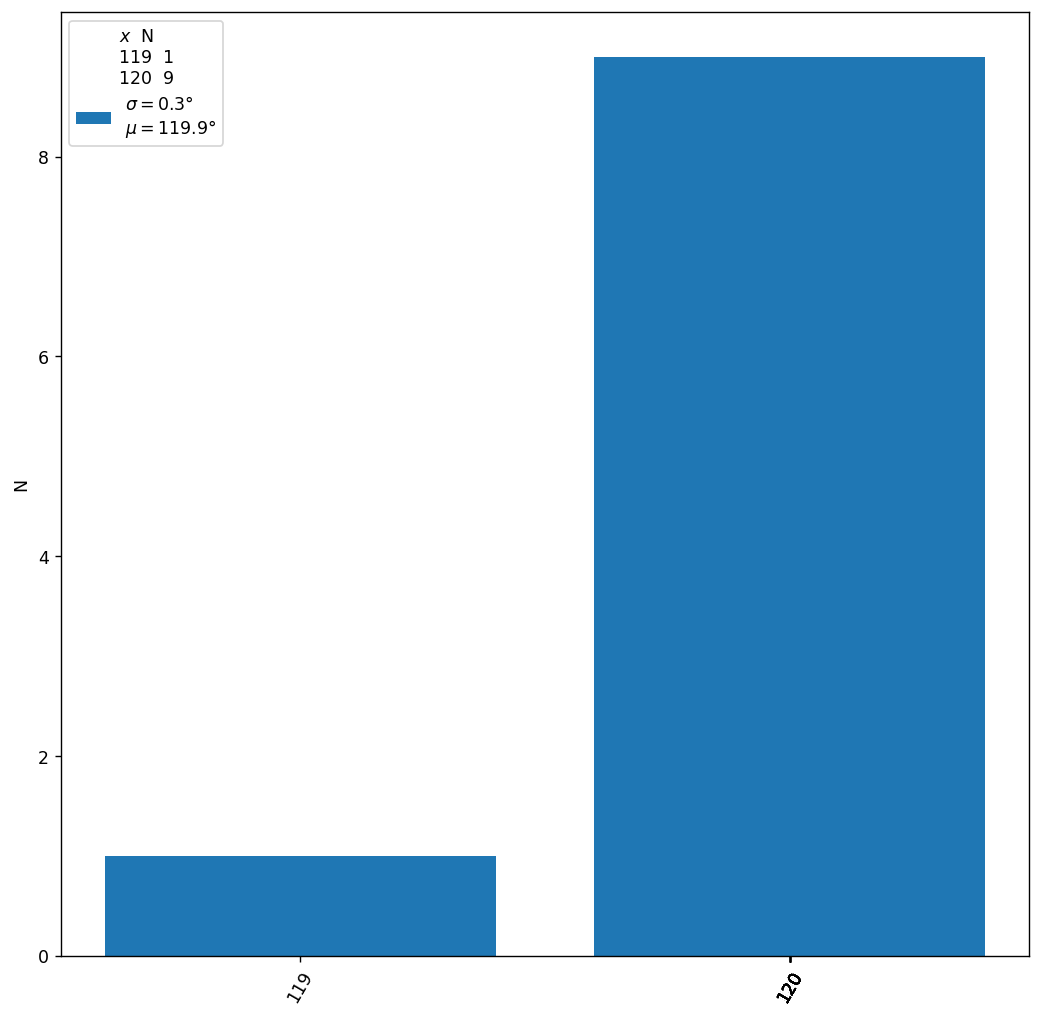

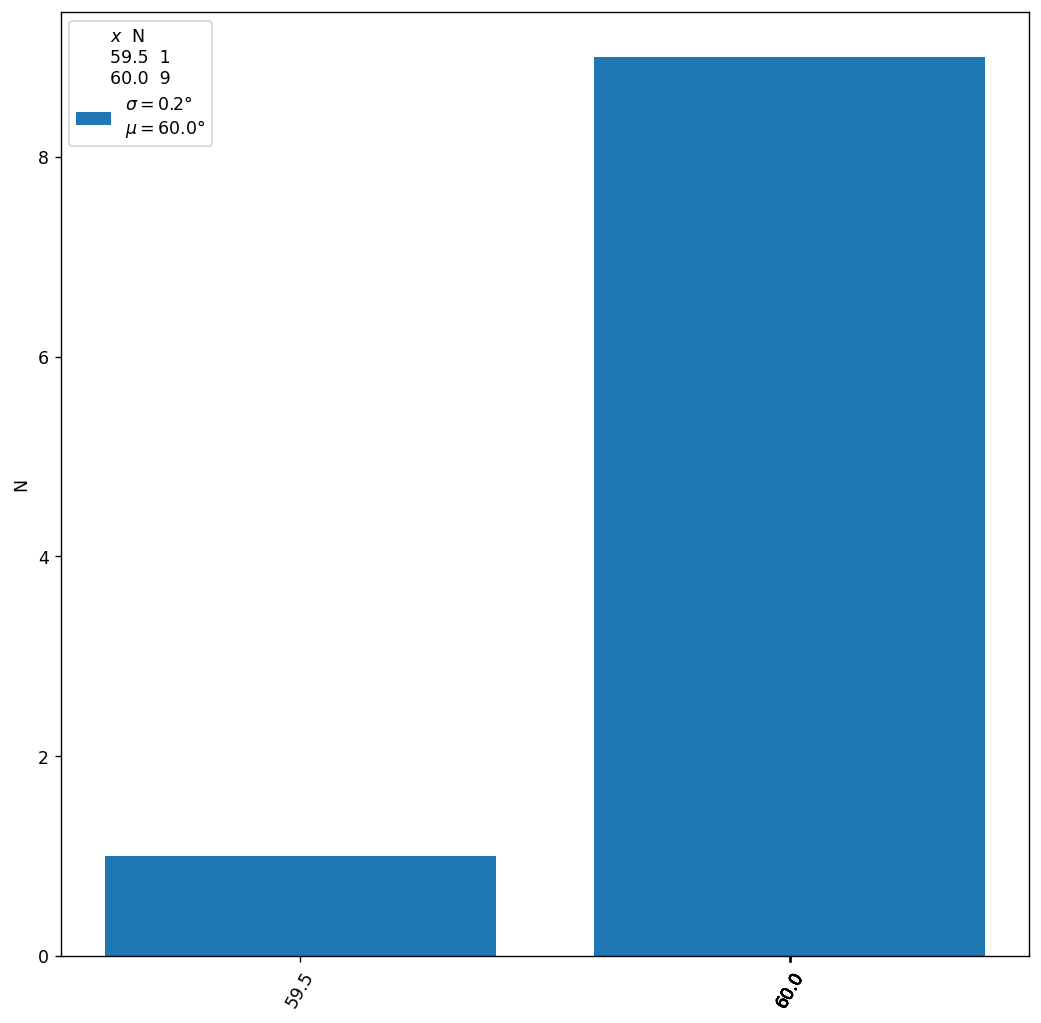

,x,ex,y,ey
0,309.0,189.0,120,1
1,307.0,187.0,120,1
2,308.5,188.0,120,1
3,337.0,217.0,120,1
4,313.5,193.0,120,1
5,338.5,219.5,119,1
6,337.5,218.0,120,1
7,298.0,178.0,120,1
8,307.5,187.0,120,1
9,322.5,202.5,120,1


In [16]:
fname2='alpha2.txt'
data2=np.loadtxt(fname2, dtype=float, comments='#')
theta1=data2[:,0]
theta2=data2[:,1]
theta=r(np.abs(theta1-theta2))
alpha2=theta/2
labhist(theta,w=0.8)
mi2,sigma2=labhist(alpha2,w=0.4)
table(theta1,theta,theta2,[1]*len(theta))


In [8]:
print('Medie +/- deviazioni standard:'+'\n'+
      r'$\alpha_1$ = '+r'({:.1f} +/- {:.1f})°'.format(mi1,sigma1)+'\n'+
      r'$\alpha_2$ = '+r'({:.1f} +/- {:.1f})°'.format(mi2,sigma2))

Medie +/- deviazioni standard:
$\alpha_1$ = (59.7 +/- 1.9)°
$\alpha_2$ = (60.0 +/- 0.2)°


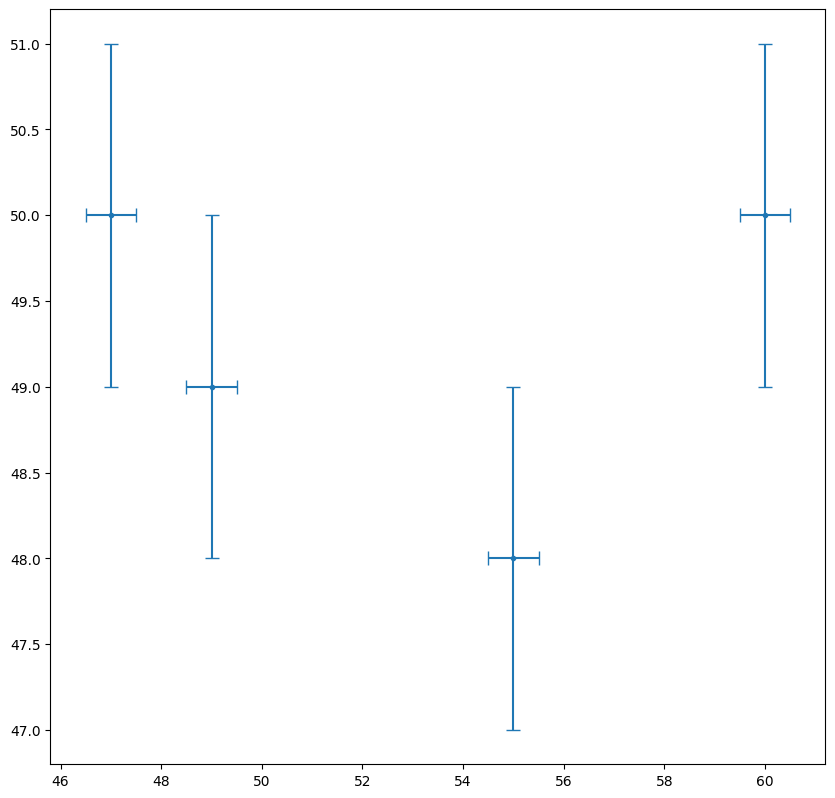

,x,ex,y,ey
0,47.0,0.5,50.0,1.0
1,49.0,0.5,49.0,1.0
3,55.0,0.5,48.0,1.0
2,60.0,0.5,50.0,1.0


In [11]:
I1err=0.5
delta1err=0.5

fname3='graph_delta_i.txt'
data3=np.loadtxt(fname3, dtype=float, comments='#')
I1=data3[:,0]
I2=data3[:,1]
i=rs(np.abs(I1-I2))/2
delta1=data3[:,2]
delta2=data3[:,3]
delta=rs(np.abs(delta1-delta2))
deltaerr=[delta1err*2]*len(delta)
ierr=[I1err*2]*len(i)
fig,ax=plt.subplots(figsize=(10,10),dpi=100)
ax.errorbar(i,delta,xerr=ierr,yerr=deltaerr,linestyle='',capsize=5,fmt='.')
plt.show()
deltamin=delta.min()

table(i,delta,ierr,deltaerr).sort_values(by=['x'])

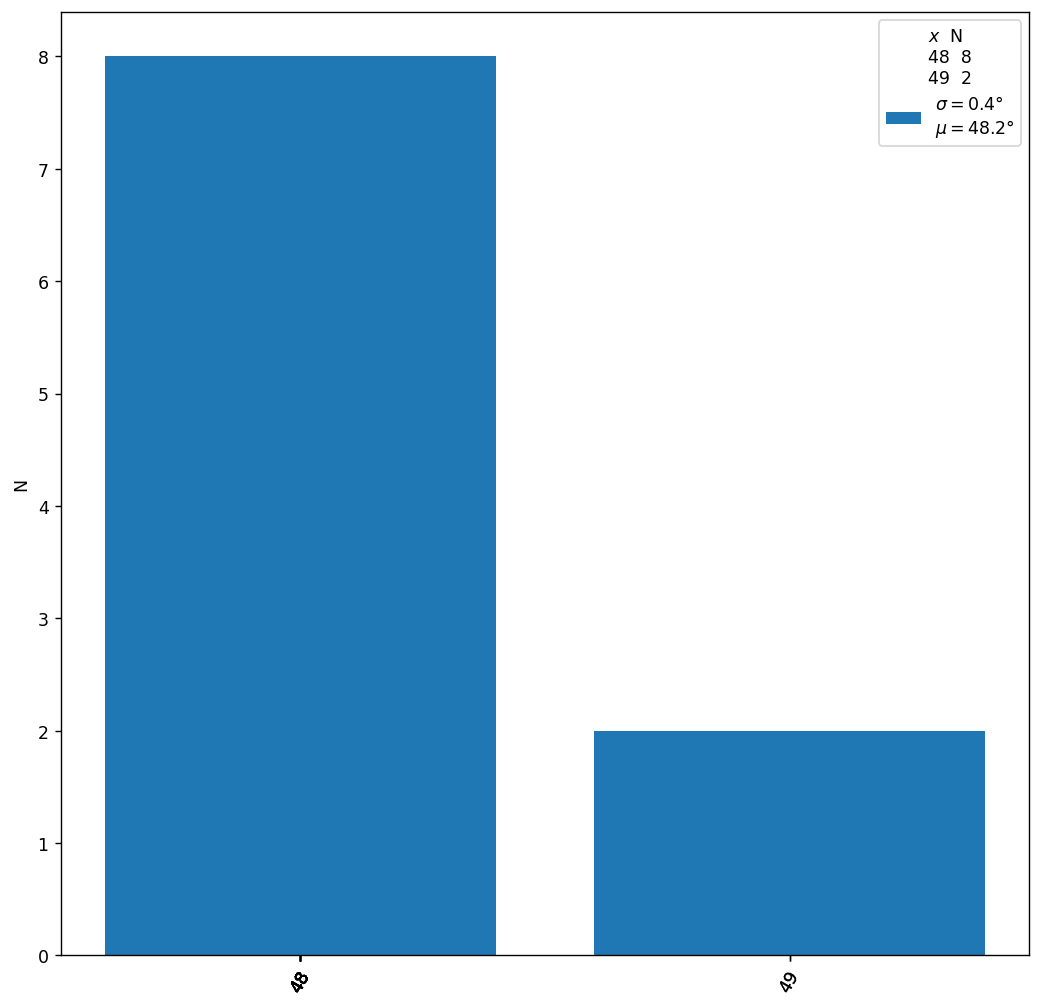

,x,ex,y,ey
0,50.5,99.5,49,1
1,77.0,126.0,49,1
2,69.5,117.5,48,1
3,60.0,108.5,48,1
4,164.5,212.5,48,1
5,134.5,182.0,48,1
6,115.5,163.0,48,1
7,71.0,118.5,48,1
8,334.0,382.0,48,1
9,226.5,274.0,48,1


In [10]:
fname4='deltamin.txt'
data4=np.loadtxt(fname4, dtype=float, comments='#')
dm1=data4[:,0]
dm2=data4[:,1]
dm=r(np.abs(dm1-dm2))
midelta,sigmadelta=labhist(dm,w=0.8)
table(dm1,dm,dm2,[1]*len(dm))

In [11]:
print('deltamin = '+r'({:.1f} +/- {:.1f})°'.format(midelta,sigmadelta))

deltamin = (48.2 +/- 0.4)°


In [13]:
drad=midelta*np.pi/180
srad=sigmadelta*np.pi/180
srad=rs(srad,1)
drad=reb(drad,srad)
erralpha1=float(input('Inserire errore alpha1:(gradi): '))
stat1=int(input('stat:1 ; max:0'   ))
erralpha2=float(input('inserire errore alpha2(gradi): '))
stat2=int(input('stat:1 ; max:0'   ))
ea1=rs(erralpha1*np.pi/180,1)
ea2=rs(erralpha2*np.pi/180,1)
alpha1=reb(mi1*np.pi/180,ea1)
alpha2=reb(mi2*np.pi/180,ea2)
if (stat1==1) and (stat2==1):
    af,e_af=wm(np.array([alpha1,alpha2]),np.array([ea1,ea2]))
elif (stat1==1) and (stat2==0):
    ea1*=3
    af,e_af=(alpha1+alpha2)/2, (ea1+ea2)/2
elif (stat1==0) and (stat2==1):
    ea2*=3
    af,e_af=(alpha1+alpha2)/2, (ea1+ea2)/2
else:
    af,e_af=(alpha1+alpha2)/2, (ea1+ea2)/2
n=np.sin((af+drad)/2)/np.sin(af/2)

if (stat1==1) and (stat2==1):
    err_n=0.5*np.sqrt( (np.cos((af+drad)/2)/np.sin(af/2)*srad)**2+(np.sin(drad/2)/np.sin(af/2)**2*e_af)**2)  
else:
    err_n=0.5*np.cos((af+drad)/2)/np.sin(af/2)*srad+np.sin(drad/2)/np.sin(af/2)**2*e_af
err_n = rs(err_n,1)
n=reb(n,err_n)
print('n=({}+/-{})'.format(n,err_n))

Inserire errore alpha1:(gradi): 2
stat:1 ; max:01
inserire errore alpha2(gradi): 0.2
stat:1 ; max:01
n=(1.621+/-0.005)
